In [5]:
import matplotlib.pyplot as plt
import numpy as np

This set of notebooks trains a deep classifier (`LinearClassifier`) with an FTRL optimizer on the following features:

- activity
- age
- artistic
- concentration
- engagement
- familiarity
- fault
- imagination
- lazy
- like_dislike
- musical_expertise
- nervous
- outgoing
- positivity
- reserved
- stress
- tension
- thorough
- trusting
- hallelujah_reaction
- hearing_impairments
- music_pref_classical
- music_pref_dance
- music_pref_folk
- music_pref_hiphop
- music_pref_jazz
- music_pref_none
- music_pref_pop
- music_pref_rock
- music_pref_traditional_irish
- music_pref_world
- language
- location
- nationality
- sex

The `LinearClassifier` was configured thus:

    learning_rate = 0.1
    optimizer = tf.train.FtrlOptimizer(
        learning_rate, 
        l1_regularization_strength = 0.01,
        name = 'Optimizer',
        accum_name = 'accum_name',
        linear_name = 'linear_name'
    )
    
    estimator = tf.estimator.LinearClassifier(
        model_dir = model_dir,
        feature_columns = deep_columns,
        optimizer = optimizer,
        config=checkpointing_config)

Batch training was performed (n = 303) for 2,500,000 epochs. Evaluation results from this training were:

- Accuracy = 0.60655737
- Accuracy baseline = 0.6721312
- AUC = 0.44451225
- AUC-PR = 0.27933937
- Average loss = 1.2761109
- F1 score = 0.07692308
- False negatives = 19.0
- False positives = 5.0
- Label/mean = 0.32786885
- Loss = 77.842766
- Precision = 0.16666667
- Prediction/mean = 0.21546403
- Recall = 0.05
- True negatives = 36.0
- True positives = 1.0

The resulting weights were as follows:

- activity: [[-0.6835154]] 
- age: [[-0.2851157]] 
- artistic: [[0.17561275]] 
- bias_weights: [-0.3835333] 
- concentration: [[-0.2734286]] 
- engagement: [[0.22498131]] 
- familiarity: [[-0.5121358]] 
- fault: [[0.8032973]] 
- hearing_impairments: [[0.52063507]] 
- imagination: [[-0.48841015]] 
- language_indicator: [[ 0.        ] [-0.07626927] [ 0.19300148]] 
- lazy: [[0.59279585]] 
- like_dislike: [[-0.39339232]] 
- location_indicator: [[-0.8469816 ] [ 0.07724354] [-0.19419499]] 
- music_pref_classical: [[0.15256406]] 
- music_pref_dance: [[0.32000092]] 
- music_pref_folk: [[0.36697882]] 
- music_pref_hiphop: [[0.45616147]] 
- music_pref_jazz: [[-0.2657223]] 
- music_pref_none: [[-7.944376]] 
- music_pref_pop: [[0.25082773]] 
- music_pref_rock: [[0.86881644]] 
- music_pref_traditional_irish: [[0.36367074]] 
- music_pref_world: [[-0.50851446]] 
- musical_expertise: [[-0.81934536]] 
- nationality_indicator: [[-0.68674463] [-0.2880403 ] [-8.45097   ] [-0.4424141 ] [-7.0232525 ] [ 8.606037  ] [ 0.5896207 ] [-8.096287  ] [-8.576811  ] [ 0.        ] [ 9.189575  ]] 
- nervous: [[0.8945189]] 
- outgoing: [[-0.37606922]] 
- positivity: [[-0.34824723]] 
- reserved: [[0.09221098]] 
- sex_indicator: [[-0.35336506] [-0.31928664]] 
- stress: [[-0.9730156]] 
- tension: [[0.5480446]] 
- thorough: [[1.227226]] 
- trusting: [[-0.6511318]] 

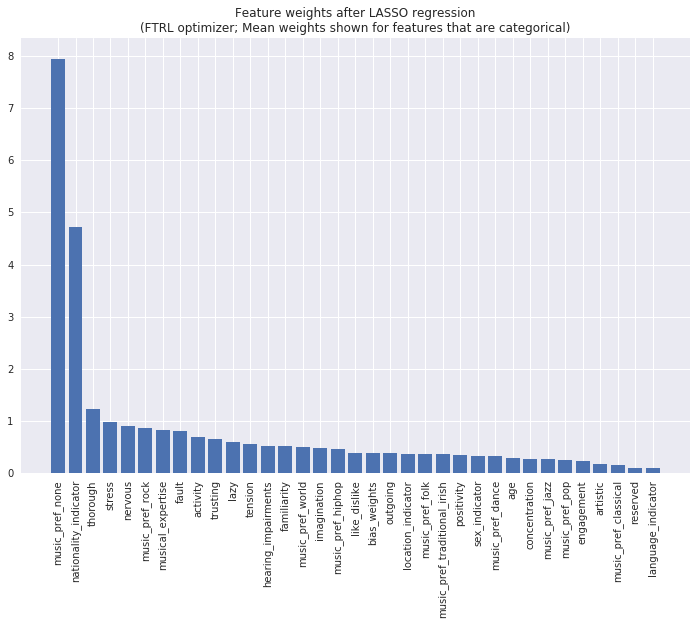

In [38]:
# Put weights into variables

weight_dict = {
  'activity': np.mean(np.abs(np.array([-0.6835154]))),
  'age': np.mean(np.abs(np.array([-0.2851157]))),
  'artistic': np.mean(np.abs(np.array([0.17561275]))),
  'bias_weights': np.mean(np.abs(np.array(-0.3835333))),
  'concentration': np.mean(np.abs(np.array([-0.2734286]))),
  'engagement': np.mean(np.abs(np.array([0.22498131]))),
  'familiarity': np.mean(np.abs(np.array([-0.5121358]))),
  'fault': np.mean(np.abs(np.array([0.8032973]))),
  'hearing_impairments': np.mean(np.abs(np.array([0.52063507]))),
  'imagination': np.mean(np.abs(np.array([-0.48841015]))),
  'language_indicator': np.mean(np.abs(np.array([0., -0.07626927, 0.19300148]))),
  'lazy': np.mean(np.abs(np.array([0.59279585]))),
  'like_dislike': np.mean(np.abs(np.array([-0.39339232]))),
  'location_indicator': np.mean(np.abs(np.array([-0.8469816, 0.0772435, -0.19419499]))),
  'music_pref_classical': np.mean(np.abs(np.array([0.15256406]))),
  'music_pref_dance': np.mean(np.abs(np.array([0.32000092]))),
  'music_pref_folk': np.mean(np.abs(np.array([0.36697882]))),
  'music_pref_hiphop': np.mean(np.abs(np.array([0.45616147]))),
  'music_pref_jazz': np.mean(np.abs(np.array([-0.2657223]))),
  'music_pref_none': np.mean(np.abs(np.array([-7.944376]))),
  'music_pref_pop': np.mean(np.abs(np.array([0.25082773]))),
  'music_pref_rock': np.mean(np.abs(np.array([0.86881644]))),
  'music_pref_traditional_irish': np.mean(np.abs(np.array([0.36367074]))),
  'music_pref_world': np.mean(np.abs(np.array([-0.50851446]))),
  'musical_expertise': np.mean(np.abs(np.array([-0.81934536]))),
  'nationality_indicator': np.mean(np.abs(np.array([-0.68674463, -0.2880403, -8.45097, -0.4424141, -7.0232525, 8.606037, 0.5896207, -8.096287, -8.576811, 0., 9.189575]))),
  'nervous': np.mean(np.abs(np.array([0.8945189]))),
  'outgoing': np.mean(np.abs(np.array([-0.37606922]))),
  'positivity': np.mean(np.abs(np.array([-0.34824723]))),
  'reserved': np.mean(np.abs(np.array([0.09221098]))),
  'sex_indicator': np.mean(np.abs(np.array([-0.35336506, -0.31928664]))),
  'stress': np.mean(np.abs(np.array([-0.9730156]))),
  'tension': np.mean(np.abs(np.array([0.5480446]))),
  'thorough': np.mean(np.abs(np.array([1.227226]))),
  'trusting': np.mean(np.abs(np.array([-0.6511318])))
}

features = []
weights = []
for key, value in weight_dict.iteritems():
  features.append(key)
  weights.append(value)

features = np.array(features)
weights = np.array(weights)
indices = (-weights).argsort()
features = features[indices]
weights = weights[indices]

plt.figure(figsize=(12,8))
plt.bar(range(len(features)), weights)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.title('Feature weights after LASSO regression\n(FTRL optimizer; Mean weights shown for features that are categorical)');

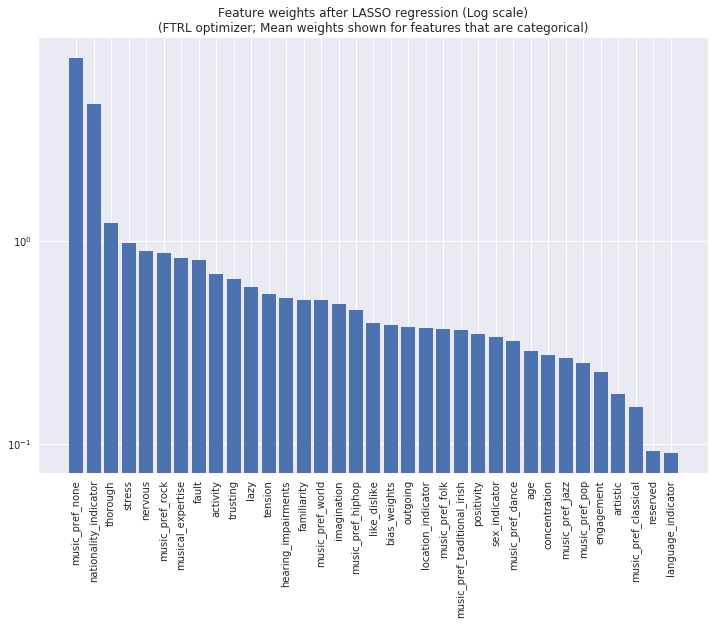

In [39]:
plt.figure(figsize=(12,8))
plt.bar(range(len(features)), weights)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.yscale('log')
plt.title('Feature weights after LASSO regression (Log scale)\n(FTRL optimizer; Mean weights shown for features that are categorical)');

When the same estimator was used with a gradient descent optimizer, the weights were as follows:

- activity: [[-39.878555]]
- age: [[-27.758709]]
- artistic: [[13.346641]]
- bias_weights: [46.699192]
- concentration: [[-10.7591715]]
- engagement: [[21.178549]]
- familiarity: [[-39.281296]]
- fault: [[56.434086]]
- hearing_impairments: [[38.67627]]
- imagination: [[-34.92629]]
- language_indicator: [[ 0.      ] [44.861294] [54.136944]]
- lazy: [[49.12809]]
- like_dislike: [[-25.084599]]
- location_indicator: [[-87.88131 ] [ 57.843933] [ 30.647478]]
- music_pref_classical: [[8.855168]]
- music_pref_dance: [[18.440495]]
- music_pref_folk: [[36.801556]]
- music_pref_hiphop: [[23.2106]]
- music_pref_jazz: [[-13.062893]]
- music_pref_none: [[-229.64133]]
- music_pref_pop: [[19.053757]]
- music_pref_rock: [[57.25656]]
- music_pref_traditional_irish: [[24.129604]]
- music_pref_world: [[-31.016937]]
- musical_expertise: [[-54.80621]]
- nationality_indicator: [[  -4.2041807] [  13.898142 ] [-372.38364  ] [-157.02368  ] [-214.595    ] [ 716.4291   ] [ -79.97341  ] [-337.8537   ] [-470.67545  ] [   0.       ] [ 911.25323  ]]
- nervous: [[68.11311]]
- outgoing: [[-23.650143]]
- positivity: [[-26.707897]]
- reserved: [[-1.5704215]]
- sex_indicator: [[-2.1554284] [-3.3303378]]
- stress: [[-70.11643]]
- tension: [[42.86527]]
- thorough: [[98.062584]]
- trusting: [[-56.109543]]


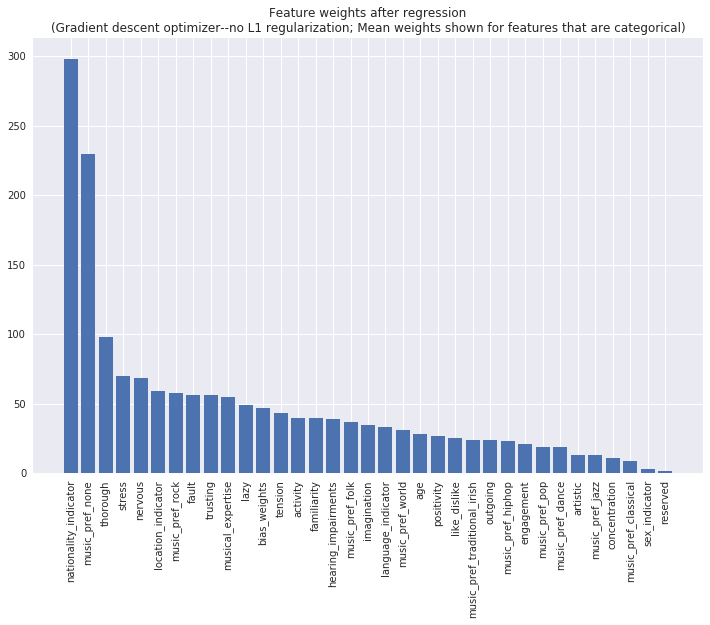

In [61]:
gd_weight_dict = {
  'activity': np.mean(np.abs(np.array([-39.878555]))),
  'age': np.mean(np.abs(np.array([-27.758709]))),
  'artistic': np.mean(np.abs(np.array([13.346641]))),
  'bias_weights': np.mean(np.abs(np.array(46.699192))),
  'concentration': np.mean(np.abs(np.array([-10.7591715]))),
  'engagement': np.mean(np.abs(np.array([21.178549]))),
  'familiarity': np.mean(np.abs(np.array([-39.281296]))),
  'fault': np.mean(np.abs(np.array([56.434086]))),
  'hearing_impairments': np.mean(np.abs(np.array([38.67627]))),
  'imagination': np.mean(np.abs(np.array([-34.92629]))),
  'language_indicator': np.mean(np.abs(np.array([0., 44.861294, 54.136944]))),
  'lazy': np.mean(np.abs(np.array([49.12809]))),
  'like_dislike': np.mean(np.abs(np.array([-25.084599]))),
  'location_indicator': np.mean(np.abs(np.array([-87.88131, 57.843933, 30.647478]))),
  'music_pref_classical': np.mean(np.abs(np.array([8.855168]))),
  'music_pref_dance': np.mean(np.abs(np.array([18.440495]))),
  'music_pref_folk': np.mean(np.abs(np.array([36.801556]))),
  'music_pref_hiphop': np.mean(np.abs(np.array([23.2106]))),
  'music_pref_jazz': np.mean(np.abs(np.array([-13.062893]))),
  'music_pref_none': np.mean(np.abs(np.array([-229.64133]))),
  'music_pref_pop': np.mean(np.abs(np.array([19.053757]))),
  'music_pref_rock': np.mean(np.abs(np.array([57.25656]))),
  'music_pref_traditional_irish': np.mean(np.abs(np.array([24.129604]))),
  'music_pref_world': np.mean(np.abs(np.array([-31.016937]))),
  'musical_expertise': np.mean(np.abs(np.array([-54.80621]))),
  'nationality_indicator': np.mean(np.abs(np.array([-4.2041807, 13.898142, -372.38364, -157.02368, -214.595, 716.4291, -79.97341, -337.8537, -470.67545, 0., 911.25323]))),
  'nervous': np.mean(np.abs(np.array([68.11311]))),
  'outgoing': np.mean(np.abs(np.array([-23.650143]))),
  'positivity': np.mean(np.abs(np.array([-26.707897]))),
  'reserved': np.mean(np.abs(np.array([-1.5704215]))),
  'sex_indicator': np.mean(np.abs(np.array([-2.1554284, -3.3303378]))),
  'stress': np.mean(np.abs(np.array([-70.11643]))),
  'tension': np.mean(np.abs(np.array([42.86527]))),
  'thorough': np.mean(np.abs(np.array([98.062584]))),
  'trusting': np.mean(np.abs(np.array([-56.109543])))
}

gd_features = []
gd_weights = []
for key, value in gd_weight_dict.iteritems():
  gd_features.append(key)
  gd_weights.append(value)

gd_features = np.array(gd_features)
gd_weights = np.array(gd_weights)
gd_indices = (-gd_weights).argsort()
gd_features = gd_features[gd_indices]
gd_weights = gd_weights[gd_indices]

plt.figure(figsize=(12,8))
plt.bar(range(len(gd_features)), gd_weights)
plt.xticks(range(len(gd_features)), gd_features, rotation='vertical')
plt.title('Feature weights after regression\n(Gradient descent optimizer--no L1 regularization; Mean weights shown for features that are categorical)');

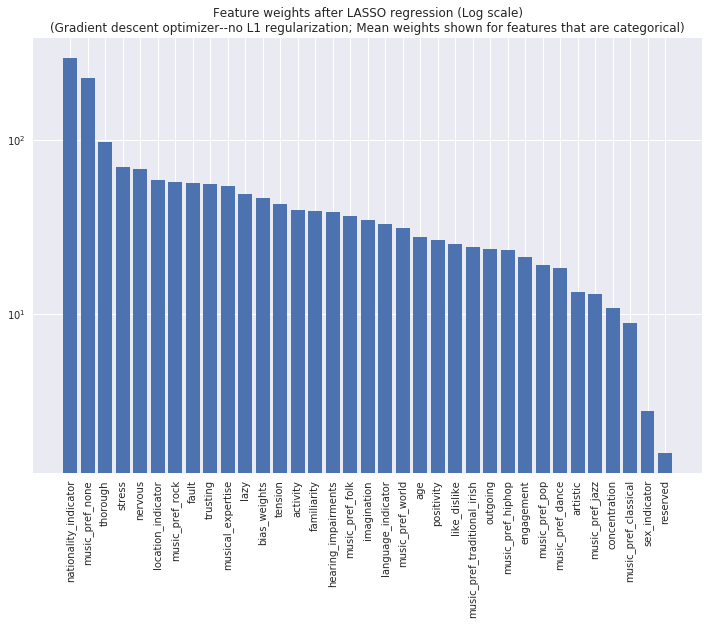

In [62]:
plt.figure(figsize=(12,8))
plt.bar(range(len(gd_features)), gd_weights)
plt.xticks(range(len(gd_features)), gd_features, rotation='vertical')
plt.yscale('log')
plt.title('Feature weights after LASSO regression (Log scale)\n(Gradient descent optimizer--no L1 regularization; Mean weights shown for features that are categorical)');

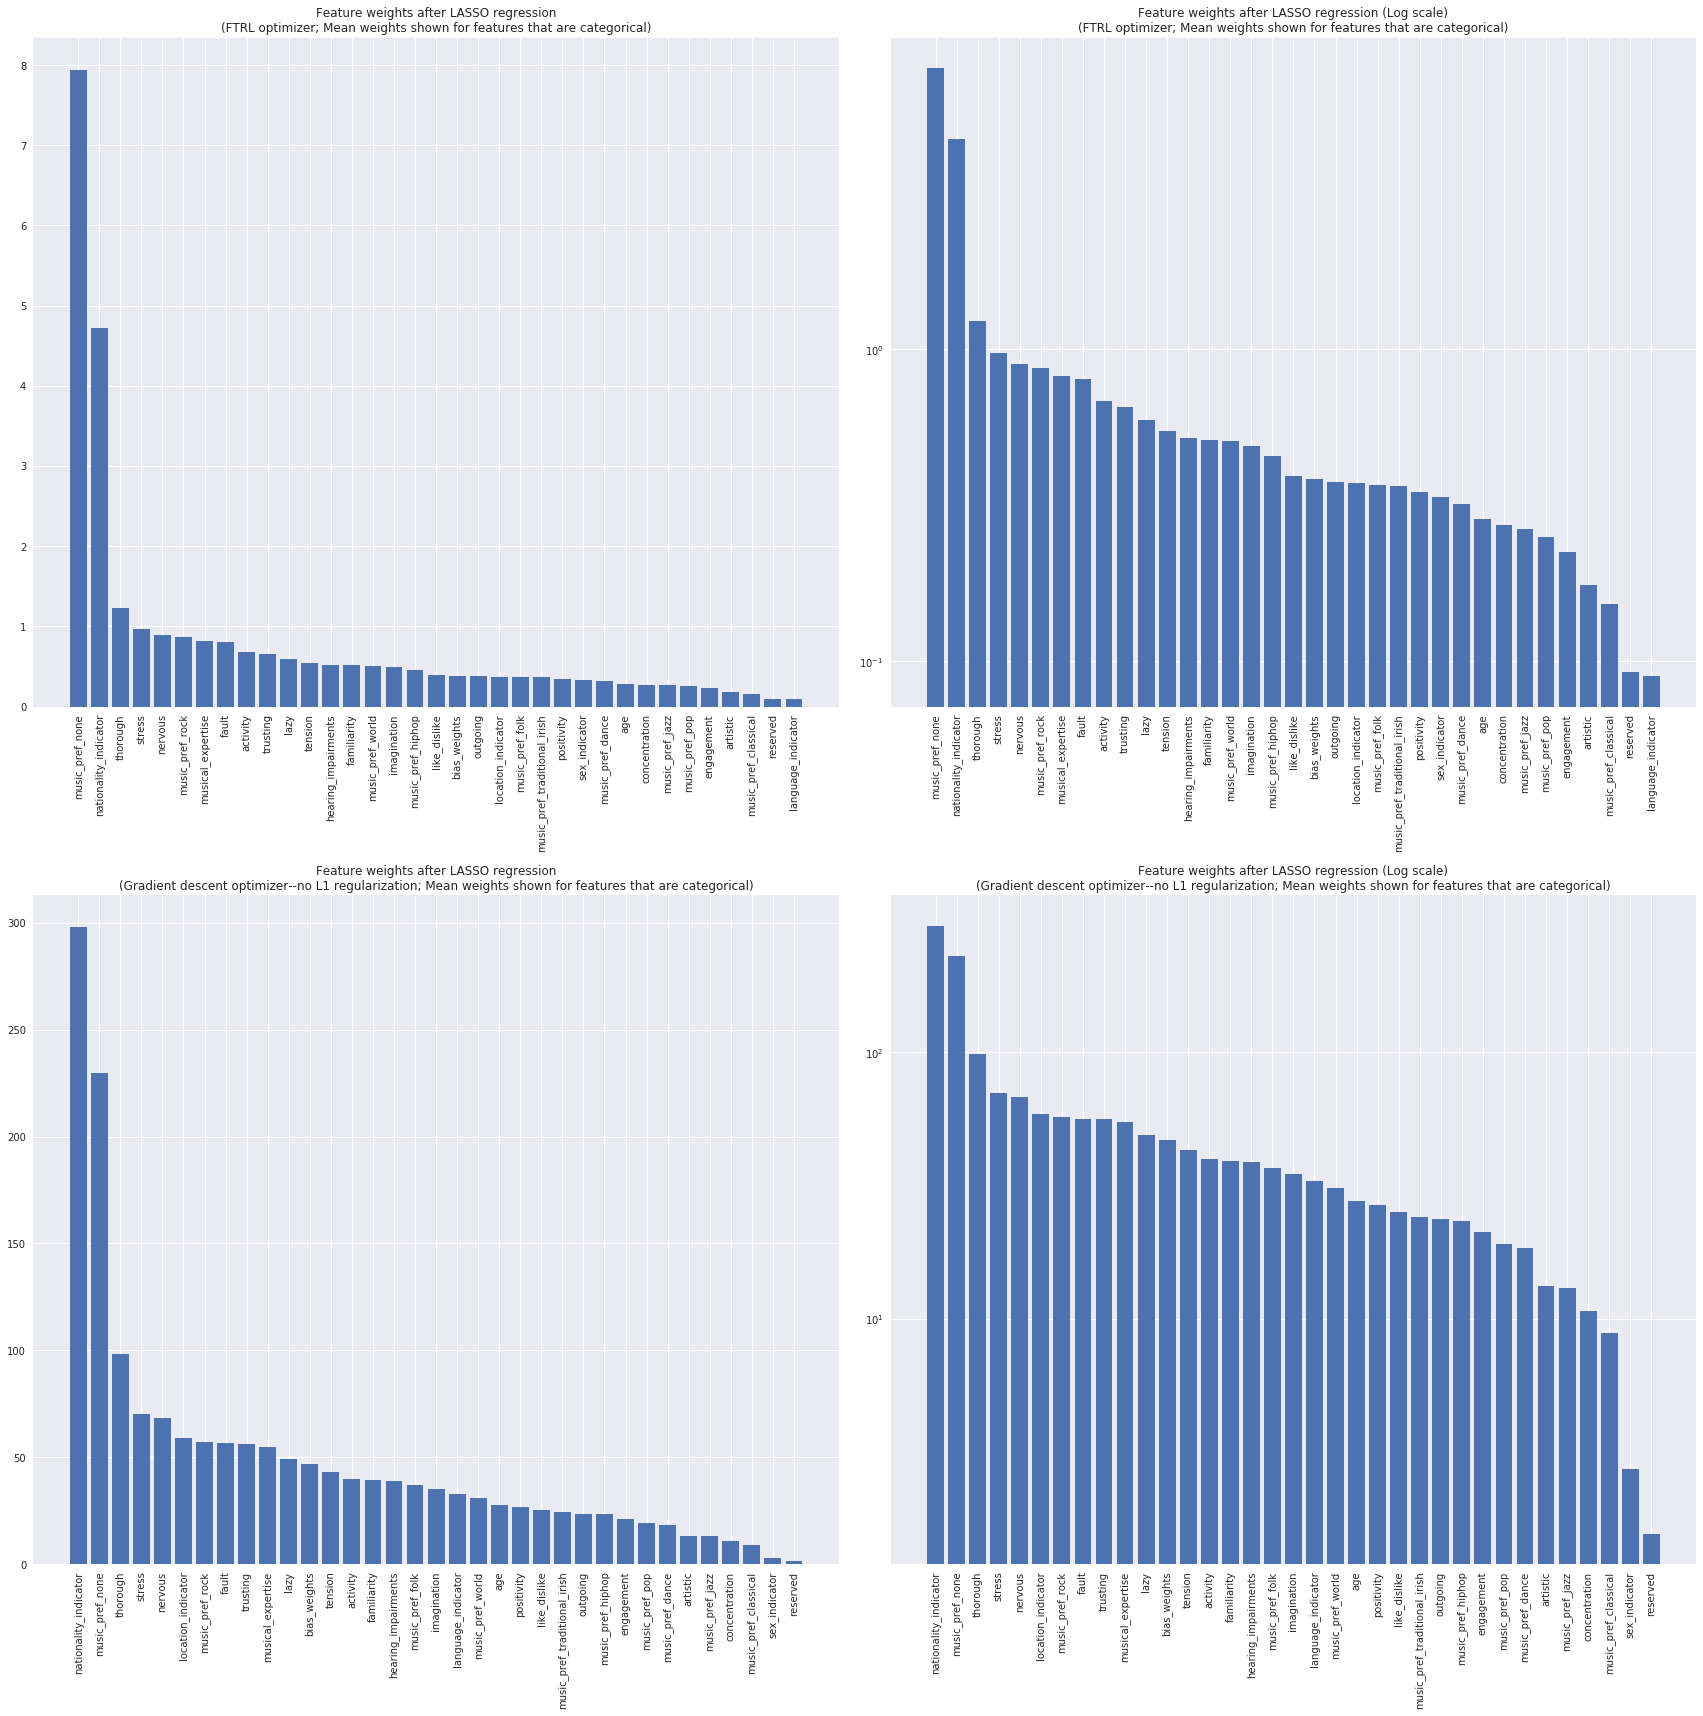

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,24))

plt.sca(ax[0,0])
plt.bar(range(len(features)), weights)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.title('Feature weights after LASSO regression\n(FTRL optimizer; Mean weights shown for features that are categorical)');

plt.sca(ax[0,1])
plt.bar(range(len(features)), weights)
plt.xticks(range(len(features)), features, rotation='vertical')
plt.yscale('log')
plt.title('Feature weights after LASSO regression (Log scale)\n(FTRL optimizer; Mean weights shown for features that are categorical)');

plt.sca(ax[1,0])
plt.bar(range(len(gd_features)), gd_weights)
plt.xticks(range(len(gd_features)), gd_features, rotation='vertical')
plt.title('Feature weights after LASSO regression\n(Gradient descent optimizer--no L1 regularization; Mean weights shown for features that are categorical)');

plt.sca(ax[1,1])
plt.bar(range(len(gd_features)), gd_weights)
plt.xticks(range(len(gd_features)), gd_features, rotation='vertical')
plt.yscale('log')
plt.title('Feature weights after LASSO regression (Log scale)\n(Gradient descent optimizer--no L1 regularization; Mean weights shown for features that are categorical)')

plt.tight_layout()

In [69]:
print('LASSO features sorted by weight in descending order (ranked gradient descent features on right):')
for i, z in enumerate(zip(features, weights, gd_features, gd_weights)):
  print('{}. {}: {}\t\t\t\t{}: {}'.format(i + 1, z[0], z[1], z[2], z[3]))

LASSO features sorted by weight in descending order (ranked gradient descent features on right):
1. music_pref_none: 7.944376				nationality_indicator: 298.026321155
2. nationality_indicator: 4.72270474818				music_pref_none: 229.64133
3. thorough: 1.227226				thorough: 98.062584
4. stress: 0.9730156				stress: 70.11643
5. nervous: 0.8945189				nervous: 68.11311
6. music_pref_rock: 0.86881644				location_indicator: 58.790907
7. musical_expertise: 0.81934536				music_pref_rock: 57.25656
8. fault: 0.8032973				fault: 56.434086
9. activity: 0.6835154				trusting: 56.109543
10. trusting: 0.6511318				musical_expertise: 54.80621
11. lazy: 0.59279585				lazy: 49.12809
12. tension: 0.5480446				bias_weights: 46.699192
13. hearing_impairments: 0.52063507				tension: 42.86527
14. familiarity: 0.5121358				activity: 39.878555
15. music_pref_world: 0.50851446				familiarity: 39.281296
16. imagination: 0.48841015				hearing_impairments: 38.67627
17. music_pref_hiphop: 0.45616147				music_pref_folk

The LASSO model is located at `gs://eim-muse/analysis/hallelujah-effect/models/basic_features`